##### Packages

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

### Dataset Reading

In [136]:
mall=pd.read_csv(r"C:\PGA32\MeriSkill\Mall_Customers.csv")

In [137]:
mall.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [138]:
mall.shape

(200, 5)

In [139]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## There are No Missing Value

In [140]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [108]:
mall.describe(percentiles=[0.05, 0.1,.9, .25, .45, .50,.75,.95, .96, .97, .98, .99]).T

,count,mean,std,min,5%,10%,25%,45%,50%,75%,90%,95%,96%,97%,98%,99%,max
CustomerID,200.0,100.50,57.879185,1.0,10.95,20.9,50.75,90.55,100.5,150.25,180.1,190.05,192.04,194.03,196.02,198.01,200.0
Age,200.0,38.85,13.969007,18.0,19.00,21.0,28.75,35.00,36.0,49.00,59.1,66.05,67.00,67.03,68.00,69.01,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,19.00,23.9,41.50,58.55,61.5,78.00,93.4,103.00,103.40,113.21,120.12,126.11,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,6.00,13.0,34.75,47.55,50.0,73.00,87.1,92.00,93.00,94.03,95.04,97.01,99.0


In [109]:
mall.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


##### Information about Dataframe 

In [110]:
mall.dtypes.value_counts()

int64     4
object    1
dtype: int64

##### Removing white spaces and remaining columns

In [111]:
mall.columns=mall.columns.str.replace(" ","")
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

##### Renaming columns

In [112]:
mall.columns=mall.rename(columns={'AnnualIncome(k$)':'Annual_Income',
                                  'SpendingScore(1-100)':'Spending_Score',"Genre":"Gender"}).columns

In [113]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

##### Viewing int columns

In [114]:
int_col=mall.select_dtypes(include="int64").columns.tolist()

In [115]:
int_col

['CustomerID', 'Age', 'Annual_Income', 'Spending_Score']

##### Viewing categorical columns

In [116]:
cat_col=mall.select_dtypes(include="O").columns.tolist()

In [40]:
cat_col

['Gender']

##### Drop the id column

In [117]:
copy_mall=mall.copy()
mall.drop("CustomerID",axis=1,inplace=True)

##### Summary statistics

In [118]:
mall.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# EDA

##### looking for outliers through boxplot

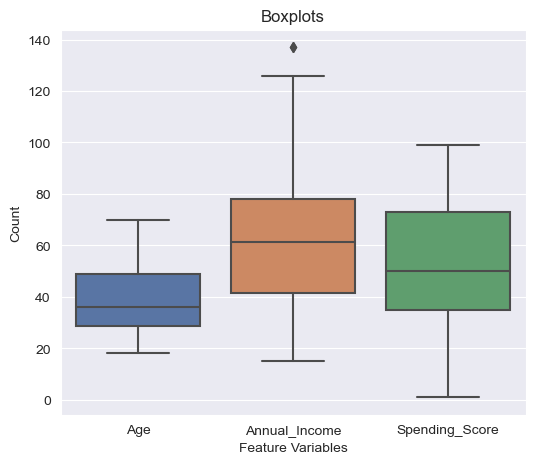

In [119]:
sns.set({"figure.figsize":(6,5)})
sns.boxplot(mall)
plt.title("Boxplots")
plt.xlabel("Feature Variables")
plt.ylabel("Count")
plt.show()

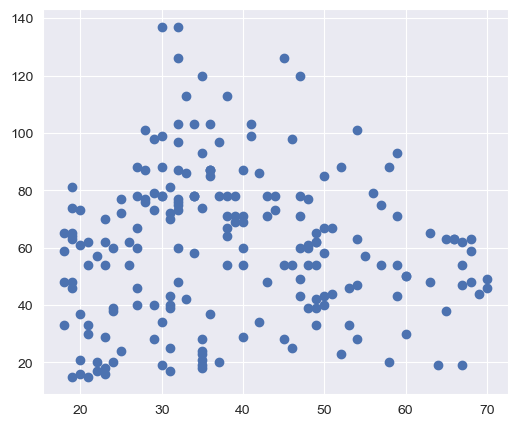

<Figure size 1200x600 with 0 Axes>

In [120]:
plt.scatter(mall['Age'],mall['Annual_Income'])
plt.figure(figsize=(12,6))
plt.show()

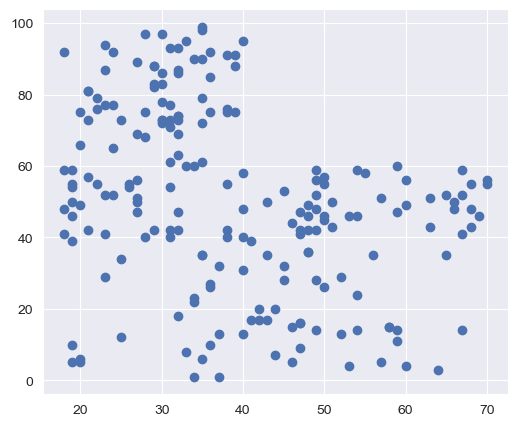

<Figure size 1200x800 with 0 Axes>

In [121]:
plt.scatter(mall['Age'], mall['Spending_Score'])
plt.figure(figsize=(12,8))
plt.show()

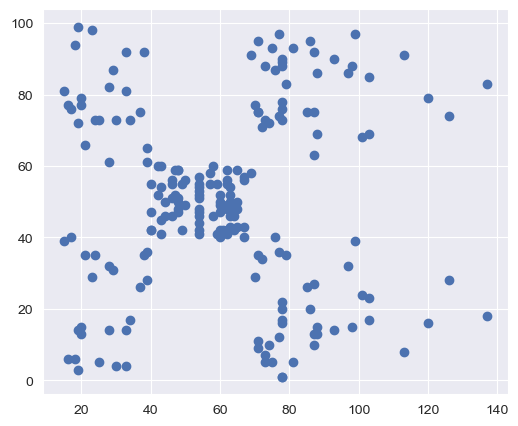

<Figure size 1200x800 with 0 Axes>

In [122]:
plt.scatter(mall['Annual_Income'], mall['Spending_Score'])
plt.figure(figsize=(12,8))
plt.show()

##### Plotting gender for count

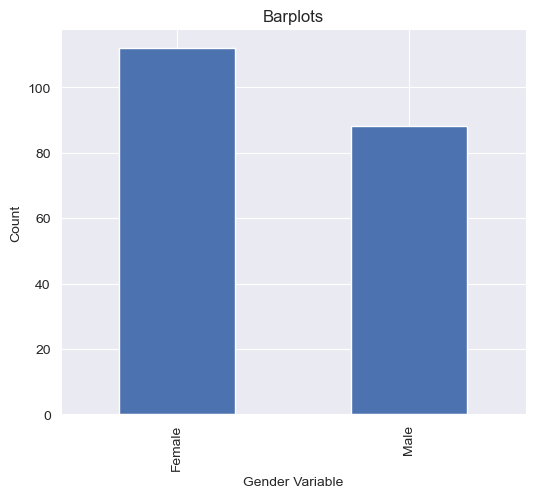

In [123]:
mall.Gender.value_counts().plot(kind="bar")
plt.title("Barplots")
plt.xlabel("Gender Variable")
plt.ylabel("Count")
plt.show()

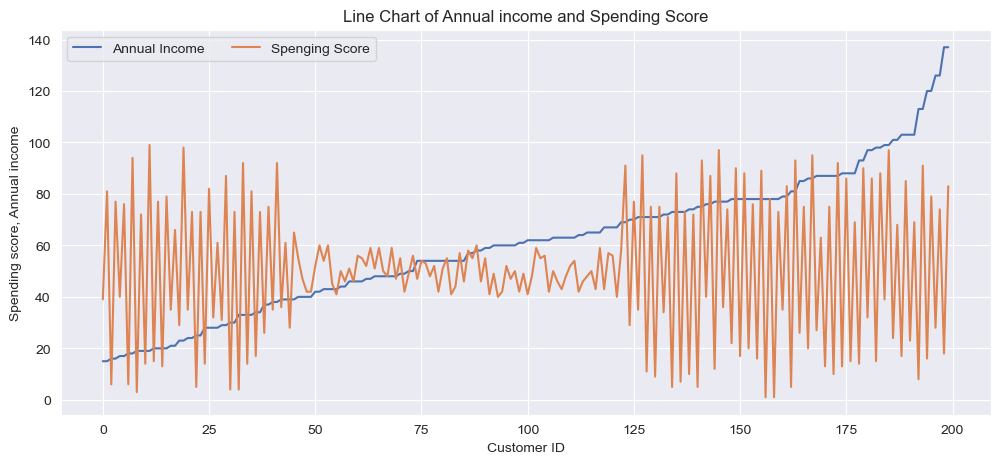

In [130]:
plt.figure(figsize=(12,5))
plt.plot(mall['Annual_Income'])
plt.plot(mall['Spending_Score'])
plt.title('Line Chart of Annual income and Spending Score')
plt.xlabel('Customer ID')
plt.ylabel('Spending score, Annual income')
plt.legend(["Annual Income","Spenging Score"],loc="best",ncol=2)
plt.show()

#### Kernel Density Estimation (KDE) plot for Annual_Income

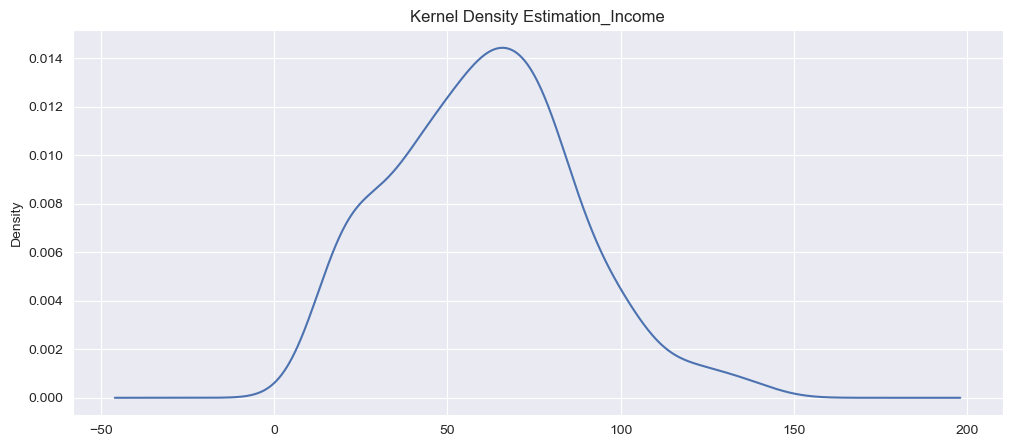

In [133]:
plt.figure(figsize=(12,5))
mall.Annual_Income.plot(kind="kde")
plt.title('Kernel Density Estimation_Income')
plt.show()

##### Scatter plot for the Annual_Income & Spending_Score

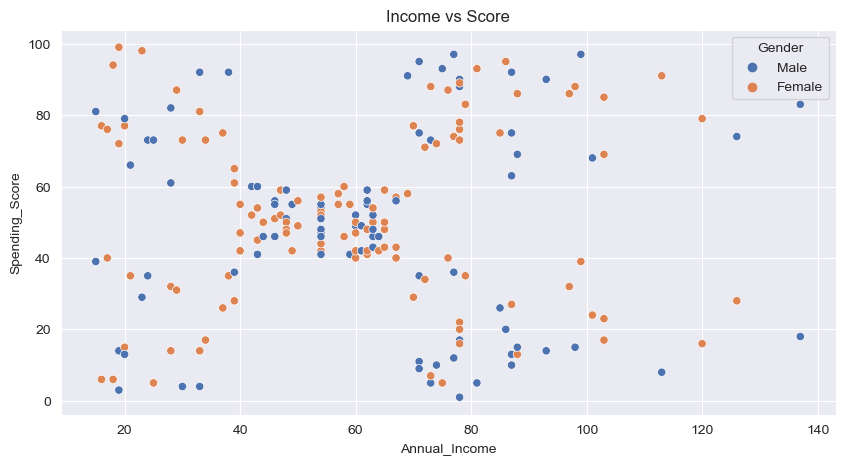

In [60]:
sns.set({"figure.figsize":(10,5)})
sns.scatterplot(data=mall,x='Annual_Income',y='Spending_Score',hue="Gender")
plt.title('Income vs Score')
plt.show()

##### Scatter plot for the Age & Spending_Score

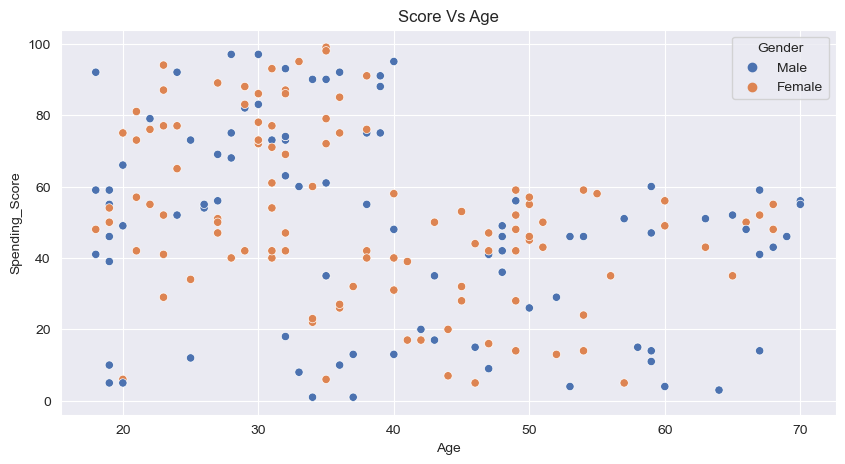

In [61]:
sns.scatterplot(data=mall, x='Age', y='Spending_Score', hue='Gender')
plt.title('Score Vs Age')
plt.show()

##### We interpret that the age (40-60) of having spending score around (20-60), 
##### The age (20-40) of having higher spending score around (40-100) and 
##### The age (60-70) of having balanced spending score around (40-60) respectively .

### Data Preprocessing

##### Converting gender to binary

In [62]:
mall.Gender=np.where(mall["Gender"]=="Male",1,0)
mall.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

In [63]:
mall.head(10)

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [64]:
mall.tail(10)

,Gender,Age,Annual_Income,Spending_Score
190,0,34,103,23
191,0,32,103,69
192,1,33,113,8
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

##### Scaling desired columns for modelling

In [76]:
scaler=StandardScaler()
scaled_val=scaler.fit_transform(mall[["Annual_Income","Spending_Score"]])

##### Creating a new dataframe with out Gender variable

In [77]:
features=pd.DataFrame(scaled_val,columns=mall.columns[2:4].tolist())
features

,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## Model Building & Evaluation

##### To get optimal number of clusters (K) for KMeans cluster algo.

# Elbow Method

In [78]:
wcss =[]
for i in range(1, 20):
    km=KMeans(n_clusters=i)
    km_result=km.fit(features)
    wcss.append(km_result.inertia_)
    print(f"for k ={i} ; intertia ={km_result.inertia_}")
wcss[:8]

for k =1 ; intertia =400.0
for k =2 ; intertia =269.69101219276394
for k =3 ; intertia =157.70400815035947
for k =4 ; intertia =108.92131661364357
for k =5 ; intertia =65.56840815571681
for k =6 ; intertia =55.067795914519664
for k =7 ; intertia =45.33255486071674
for k =8 ; intertia =37.16437459186352
for k =9 ; intertia =32.392267630331176
for k =10 ; intertia =29.178990420014017
for k =11 ; intertia =26.697844813795925
for k =12 ; intertia =24.10730949079404
for k =13 ; intertia =21.084158216357018
for k =14 ; intertia =19.713003100229436
for k =15 ; intertia =18.40055227263763
for k =16 ; intertia =16.55472441399283
for k =17 ; intertia =14.948021655078415
for k =18 ; intertia =13.94638289841448
for k =19 ; intertia =13.274717692288938


[400.0,
 269.69101219276394,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.067795914519664,
 45.33255486071674,
 37.16437459186352]

#### wcss (within cluster sum of squares ) are variances used to determine the value of "k" using "Elbow Method of plotting". /n Inertia_ values are sum of the squared distances of samples that are closest to their cluster centers. /n simply ,we can say that when clusters increases inertia decreases and adding clustrers doesn't improve the fit or plot.

##### Plotting of WCSS values using Elbow plot

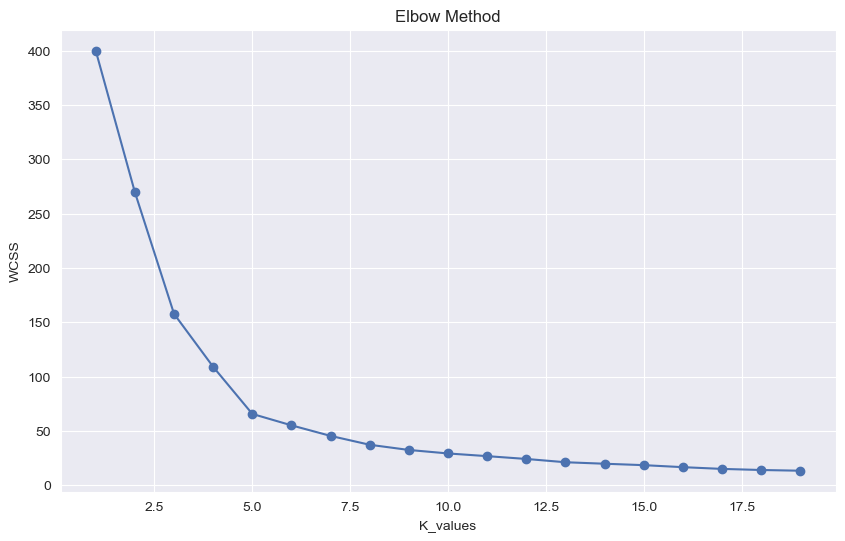

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),wcss,marker="o")

plt.xlabel('K_values')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

##### We interpret that, i took the values for k is (1-20) & the line is steadily decreasing as k values increase.so considering elbow at k=5 clusters

##### Modelling Kmeans clustring for k=5

In [80]:
k_val=5

kmeans=KMeans(n_clusters=k_val,max_iter=10,random_state=69)
kmeans.fit(features)

KMeans(max_iter=10, n_clusters=5, random_state=69)

##### cluster lables for each datapoint

In [81]:
labels=kmeans.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### No of Centroids

In [82]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

#### WCSS

In [83]:
kmeans.inertia_

65.56840815571681

#### Final required iterations

In [84]:
kmeans.n_iter_

5

#### Adding predicted labels to features

In [93]:
new_features=features.assign(clusters=pd.DataFrame(labels))
new_features

,Annual_Income,Spending_Score,clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


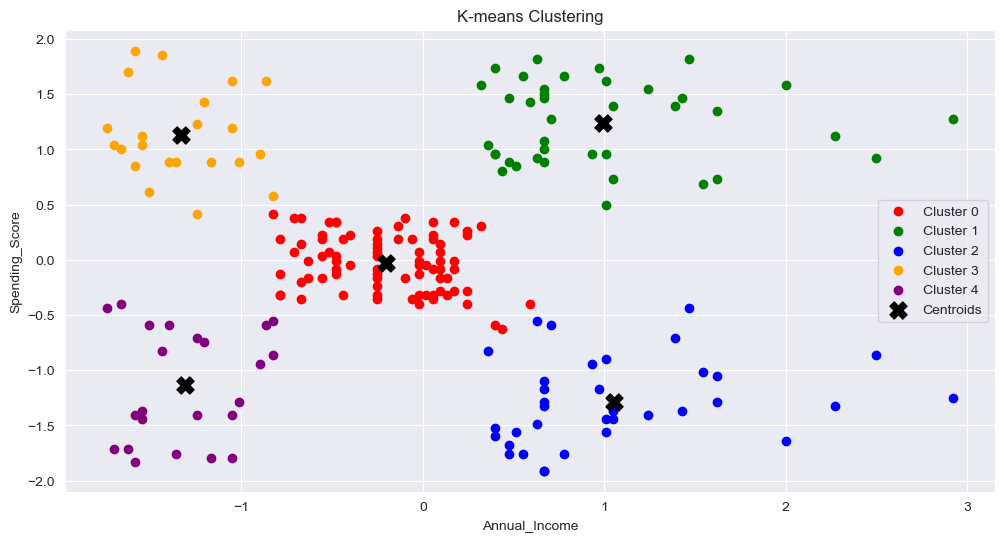

In [141]:
# Plot the clusters based on the labels assigned by K-means
plt.figure(figsize=(12, 6))

# Plot each cluster's data points with different colors
clr=["red","green","blue","orange","purple"]
for cluster_num in range(k_val):
    plt.scatter(x=new_features[new_features.clusters == cluster_num]['Annual_Income'],
               y= new_features[new_features.clusters == cluster_num]['Spending_Score'],marker='o',c=clr[cluster_num]
               ,label=f'Cluster {cluster_num}')

# Plot the cluster centers
plt.scatter(x=centroids[:, 0], y=centroids[:, 1],
            c='black', marker='X', s=150, label='Centroids')

plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.title('K-means Clustering')
plt.legend()
plt.show()

## Silhouette Method

##### Evaluation Metric

In [97]:
score=metrics.silhouette_score(features,kmeans.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(score))

Silhouette_Score Coefficient : 0.55


##### Silhouette_Score ranges from -1 to 1,which near to one is best and nearr to -1 is worst. Since we got coffecient as 0.55</i> in which datapoints are very Moderately compact with the clusters.

## Conclusion :
From the entire clustering analysis,it is to be interpreted that,

### Cluster 0 (Red):
The data points in this cluster represents that the customers with an average annual income tends to have average spending
score(-0.5 to 0.5)..So,these customers are the very balanced ones.

### Cluster 1 (Green):
The data points in this cluster represents that the customers with higher annual income tends to have higher spending
score between (-0.5 to -2).So,these customers are treated as target and more profitable ones to the business domain.

### Cluster 2 (Blue):
The data points in this cluster represents that the customers with an higher annual income tends to have lower spending
score(-2 to -0.5).So,we can treat these customers are well planned and careful ones.

### Cluster 3 (Orange):
The data points in this cluster represents that the customers with lower annual income tends to have higher spending
score(0.4 to 2).So,these customers are the are balanced ones or very careless ones.

### Cluster 4 (Purple):
The data points in this cluster represents that the customers with lower annual income tends to have low spending
score(-0.5 to -2).So,these customers are the very balanced and careful ones.

# THANK YOU